In [1]:
# %matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
import requests

# Access API key

from config import api_key

# Access cleaned housing data (using Power Query in Excel)

metro_hv_df = pd.read_csv("Data/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month_modified.csv")
metro_inventory_df = pd.read_csv("Data/Metro_invt_fs_uc_sfr_sm_month_modified.csv")
zipcode_hv_df = pd.read_csv("Data/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month_modified.csv")
census_df = pd.read_csv("Data/Census/all_census_data_zipcode.csv")

# Merge house value file with census file
hv_census_df = pd.merge(zipcode_hv_df, census_df, how='outer', on='Zipcode_Year')

# Drop zipcodes that don't have exist in one of the files
hv_census_df = hv_census_df.dropna()

# Adding affordability column (how many years of household income would it take to buy a house at the average house price)
hv_census_df["Affordability"] = hv_census_df["Average House Price"] / hv_census_df["Household Income"]

hv_census_df = hv_census_df.drop(columns=['Zipcode_y', 'Year_y'])
hv_census_df = hv_census_df.rename(columns={"Zipcode_x": "Zipcode", "Year_x": "Year"})
hv_census_df["Zipcode"] = hv_census_df["Zipcode"].astype(int)
hv_census_df["Year"] = hv_census_df["Year"].astype(int)
hv_census_df["Population"] = hv_census_df["Population"].astype(int)
hv_census_df["Household Income"] = hv_census_df["Household Income"].astype(int)
hv_census_df["Per Capita Income"] = hv_census_df["Per Capita Income"].astype(int)
hv_census_df["Poverty Count"] = hv_census_df["Poverty Count"].astype(int)
hv_census_df["Average House Price"] = hv_census_df["Average House Price"].round(2)
hv_census_df["Affordability"] = hv_census_df["Affordability"].round(2)

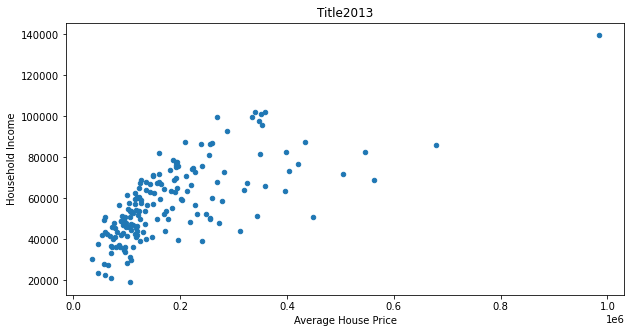

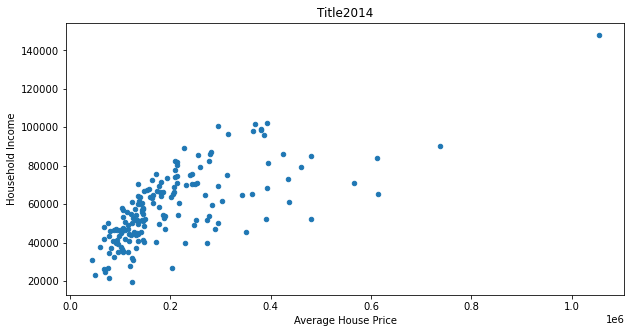

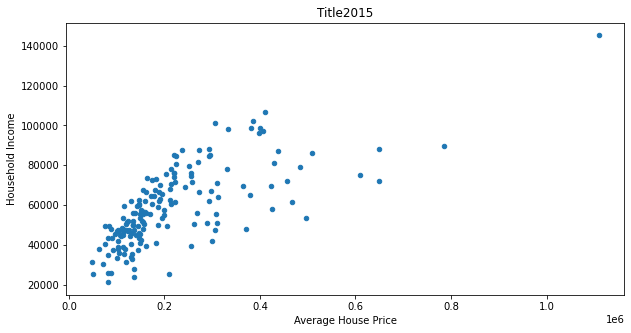

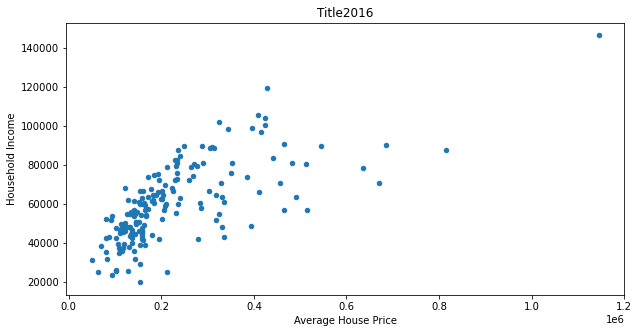

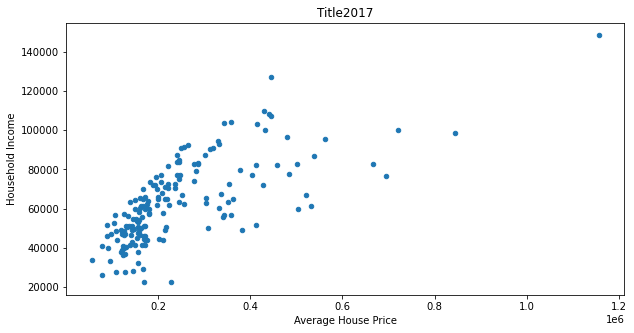

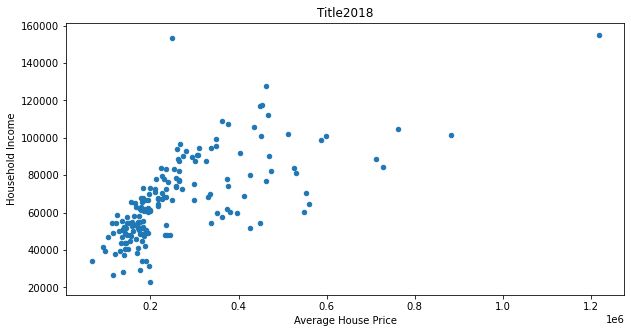

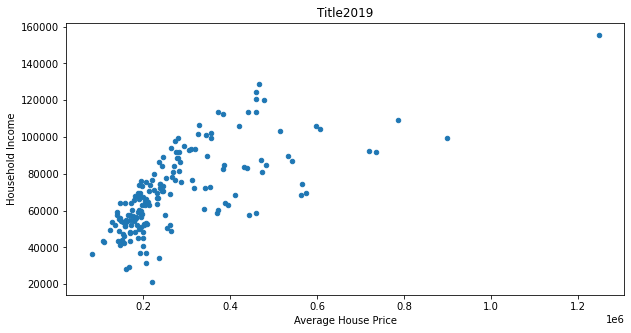

In [12]:
# Scatterplot House value vs Median household income per year

for x in range(2013, 2020):

    price_income_df = hv_census_df.loc[hv_census_df["Year"] == x]

    price_income_df = price_income_df.iloc[:, [2, 6]]

    price_income_df
    
    fig1 = price_income_df.plot.scatter(x = "Average House Price",
                                    y = "Household Income", 
                                    figsize = (10,5), 
                                    title = "Title" + str(x)
                                    )